In [1]:
from classes.data_loader import DataLoader
from classes.elasticNet_model import ElasticNet_Model
from tqdm import tqdm
from matplotlib import pyplot as plt
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# long time to run
data = DataLoader("data/usa.csv")

/Users/shoutianze/Desktop/F23/36490/36490-F23-Group1/classes/data_loader.py:17: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data: DataFrame = pd.read_csv(csv_file_path)


In [4]:
# ALPHA_VALUES = np.logspace(-4, 4, 9) # [0.0001, 0.001, ..., 10000]
# L1_RATIO_VALUES = np.linspace(0, 1, 11)  # [0.0, 0.1, ..., 1.0]
ALPHA_VALUES = [0.001]
L1_RATIO_VALUES = [0.1]
YEAR = 10000
validation_r2s = []
test_r2s = []
alphas = []
l1_ratios = []

for train_start in tqdm(range(19800101, 20000101 + 2 * YEAR, YEAR)):
    train_end = train_start + 10 * YEAR
    validate_start = train_end
    validate_end = validate_start + 5 * YEAR
    test_start = validate_end
    test_end = test_start + YEAR

    # perform grid search for the best alpha and l1_ratio hyperparameters
    best_model, best_r2, best_alpha, best_l1_ratio = ElasticNet_Model.validate(data, train_start, validate_end, ALPHA_VALUES, L1_RATIO_VALUES)
    validation_r2s.append(best_r2)
    alphas.append(best_alpha)
    l1_ratios.append(best_l1_ratio)

    # testing on an extra year of data
    test_r2 = ElasticNet_Model.evaluate(data, best_model, test_start, test_end)
    test_r2s.extend(test_r2)                                                           


100%|██████████| 22/22 [30:20<00:00, 82.77s/it]


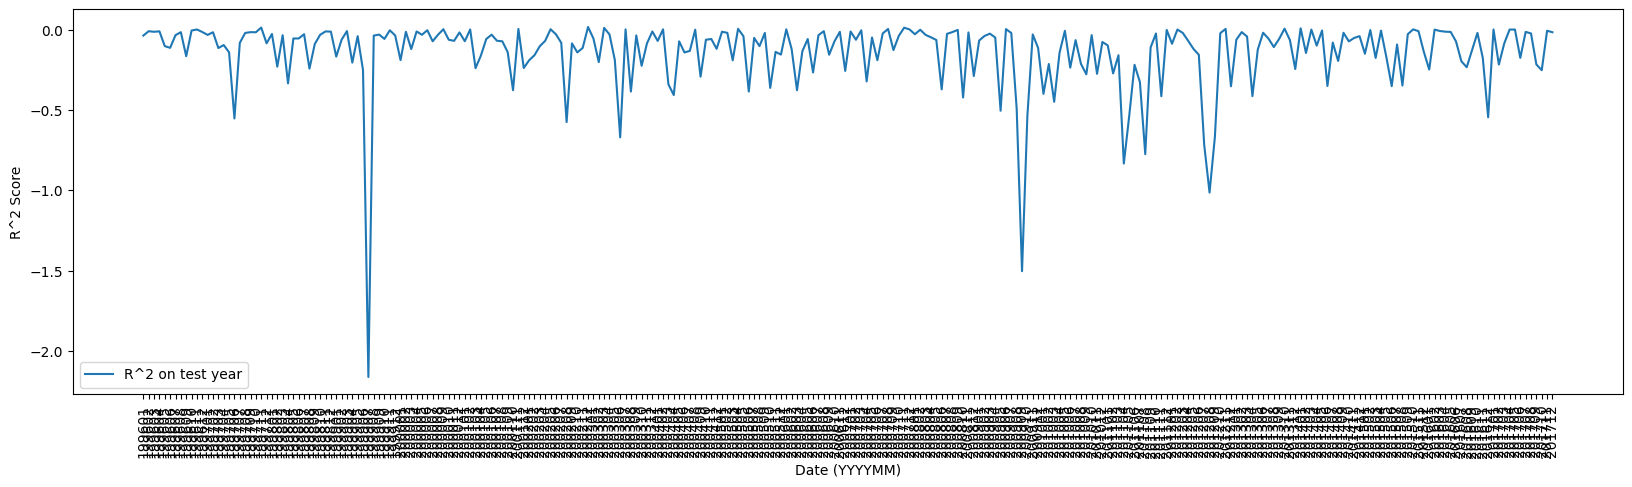

In [11]:
# evaluate r2 score by month
test_months = [year*100 + month for year in range(1996, 2018) for month in range(1, 13)]
test_months = [str(t) for t in test_months]

plt.figure(figsize=(20, 5))
plt.plot(test_months, test_r2s, label="R^2 on test year")
# plt.plot(test_months, validation_r2s, label="R^2 in validation years")
plt.xticks(rotation='vertical')
plt.xlabel('Date (YYYYMM)')
plt.ylabel('R^2 Score')
plt.legend()
plt.show()

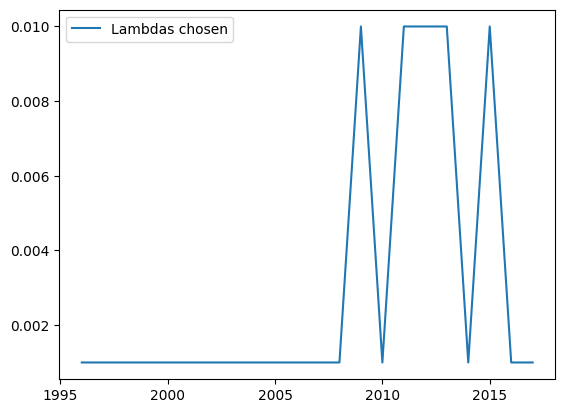

In [10]:
test_years = list(range(1996, 2018))
plt.plot(test_years, alphas, label="alphas chosen")
plt.legend()
plt.show()

In [ ]:
plt.plot(test_years, l1_ratios, label="l1_ratios chosen")
plt.legend()
plt.show()